### Exercise 1: 1D interpolation  
1. Write a function that, given a value \( \Delta \), constructs a uniformly sampled table of values

   $$
   x_i = i\Delta \quad \text{and} \quad y_i = \frac{\sin{x_i}}{x_i}, \quad i = -N \ldots N, \quad N = \left\lceil \frac{10}{\Delta} \right\rceil
   $$

   and uses `scipy.interpolate.interp1d` to return a piecewise linear interpolant function based on this table.

   Note: $\text{Sinc}(0) = 1$.


In [2]:
### Code Here
import numpy as np
from scipy.interpolate import interp1d as imp1d
def interper(delta):
    N = np.ceil(10.0/delta)
    xcol = np.linspace(-N,N)*delta
    ycol = np.sin(xcol)/xcol
    return imp1d(xcol,ycol),xcol,ycol


2. Call your function to generate an interpolant for Δ=0.5. Choose 50 random
x -values between -10 and 10 and use your interpolant to estimate the
function values at these points. Plot the interpolated values and the
original function (different color). Record the first random x -value.

Text(0.5, 1.0, 'Interpolation')

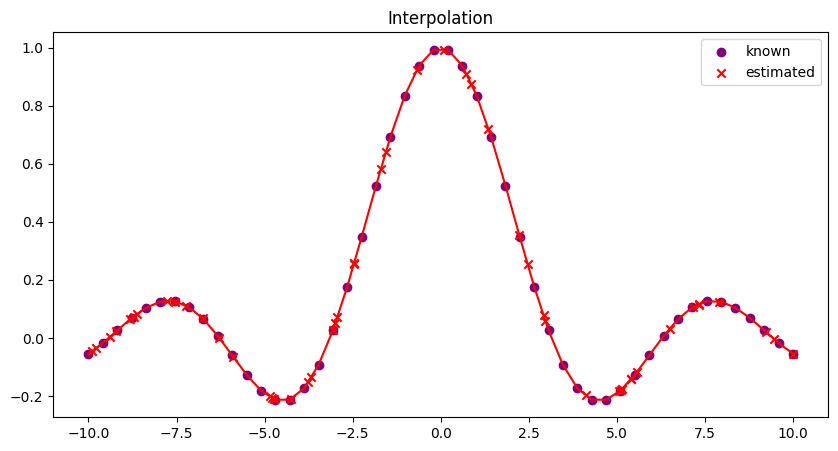

In [3]:
### Code Here
import matplotlib.pyplot as plt
f_interp,x,y = interper(.5)
x_rand = np.random.uniform(-10,10,50)
y_rand = f_interp(x_rand)
fig = plt.figure(figsize=(10,5))
plt.plot(x,y,'red')
plt.scatter(x,y,c = "Purple",label = 'known')
plt.scatter(x_rand,y_rand,marker='x', c = "Red",label = 'estimated')
plt.legend()
plt.title("Interpolation")

3. New plot:
Create a loop that varies $\Delta$ from 1 to $10^{-4}$ logarithmically, decreasing by a factor of 3 with each iteration. For each iteration, generate the interpolant for the corresponding value of $\Delta$, compute the value of the interpolant at your recorded x-value, and plot the error in the interpolated value against $\Delta$ on a log-log plot. For a piecewise linear interpolation, you should expect the error to scale like $\Delta^2$. Plot the line $\Delta^2$ on your figure to compare to your points.

-0.20904426136655926
-0.20904426136655926
-0.20904426136655926
-0.20904426136655932
-0.20904426136655932
-0.20897206644991503
-0.20902011739520948
-0.20904426136655926
-0.20904426136655926


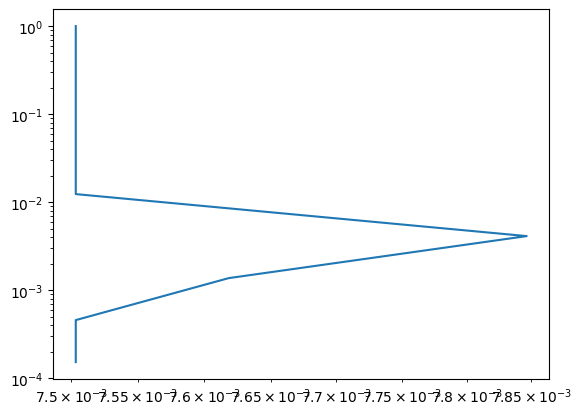

In [12]:
### Code Here
x1 = x_rand[0]
delta = 1
deltarray = np.array([])
error = np.array([])
while delta > 1e-4:
    f,x,yterp = interper(delta)

    y = np.sin(x1)/x1
    print(f(x1))
    error = np.append(error,np.abs((f(x1)-y)/y))
    deltarray = np.append(deltarray,delta)
    delta/=3

plt.loglog(error,deltarray)

### Exercise 2: 2D interpolation

Let's use `RectBivariateSpline` to do bicubic interpolation of the function

$$
f(r) = e^{-r/5} \cos 2r
$$

where $r$ = $\sqrt{x^2 + y^2}$.

In [5]:
### Code Here

1. As before, write a function that, given $\Delta$, returns a bicubic interpolant of the above function for gridded data in the domain $[-10,10]$ $\times [-10,10]$ with spacing $\Delta$.

In [6]:
### Code Here

2. Use your function to generate an interpolant for $\Delta$=0.5. Choose 1000 random $(x, y)$ pairs in the above domain and evaluate the interpolant at those points.


In [7]:
### Code Here

3. Make a 3D scatter plot of your interpolated $(x, y, f)$ values colored according to the interpolated $f$ values.


In [8]:
### Code Here

In [9]:
%%capture
# Here we use a script to generate pdf and save it to google drive.

# After executing this cell, you will be asked to link to your GoogleDrive account.
# Then, the pdf will be generated and saved to your GoogleDrive account and you need to go there to download;

from google.colab import drive
drive.mount('/content/drive')
# install tex; first run may take several minutes
! apt-get install texlive-xetex
# file path and save location below are default; please change if they do not match yours
! jupyter nbconvert --output-dir='./drive/MyDrive/' './drive/MyDrive/Colab Notebooks/lec23_ASTR310.ipynb' --to pdf

ModuleNotFoundError: No module named 'google.colab'